In [1]:
import pandas as pd

df=pd.read_csv('c:/data/house/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

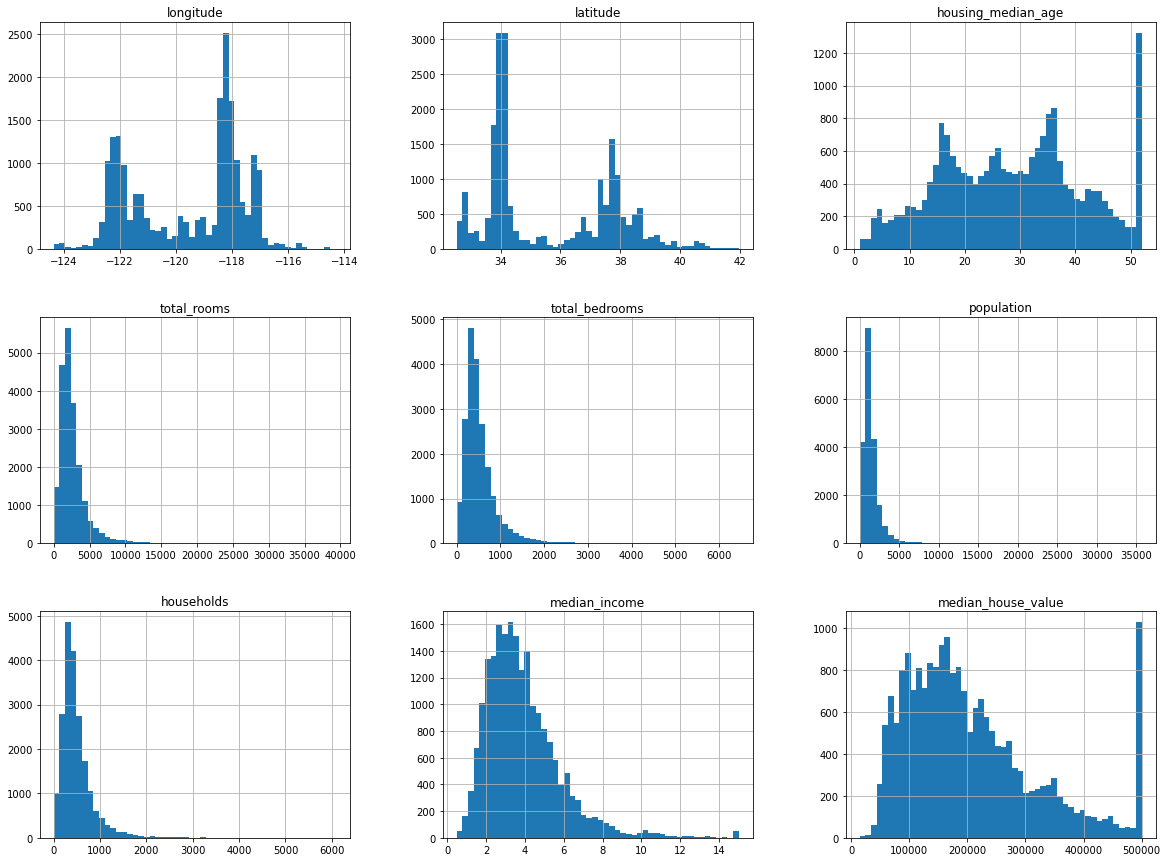

In [3]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

In [4]:
import numpy as np
np.random.seed(42)

[Text(0.5, 0, 'longitude'), Text(0, 0.5, 'latitude')]

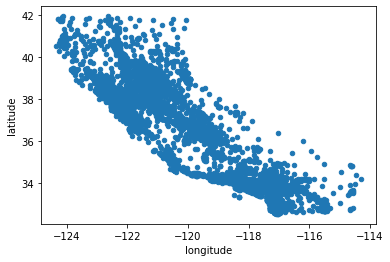

In [5]:
ax=df.plot(kind="scatter", x="longitude", y="latitude")
ax.set(xlabel='longitude', ylabel='latitude')

[Text(0.5, 0, 'longitude'), Text(0, 0.5, 'latitude')]

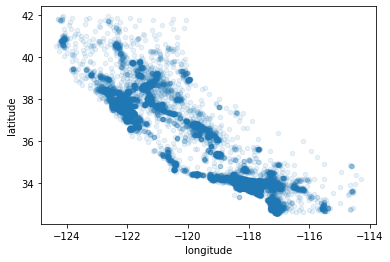

In [6]:
ax = df.plot(kind="scatter", x="longitude", y="latitude",
alpha=0.1)
ax.set(xlabel='longitude', ylabel='latitude')

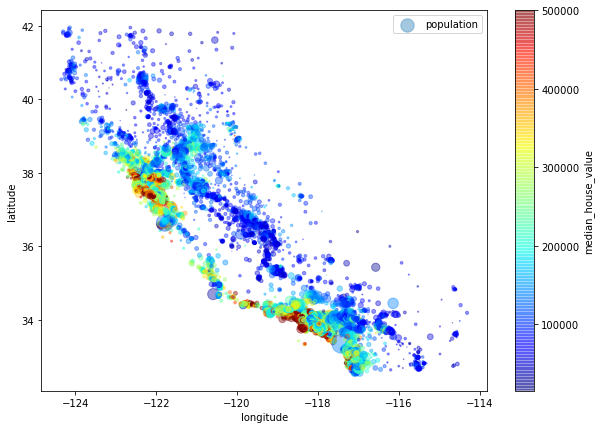

In [7]:
ax=df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df["population"]/100, label="population", 
figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,sharex=False)
ax.set(xlabel='longitude', ylabel='latitude')
plt.legend()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

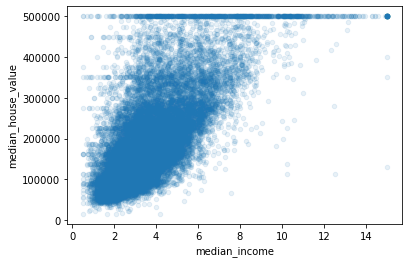

In [8]:
df.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [9]:
df_cat=df['ocean_proximity']
df_cat.head(10)

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
5    NEAR BAY
6    NEAR BAY
7    NEAR BAY
8    NEAR BAY
9    NEAR BAY
Name: ocean_proximity, dtype: object

In [10]:
df2=pd.get_dummies(data=df,columns=['ocean_proximity'])
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


<AxesSubplot:>

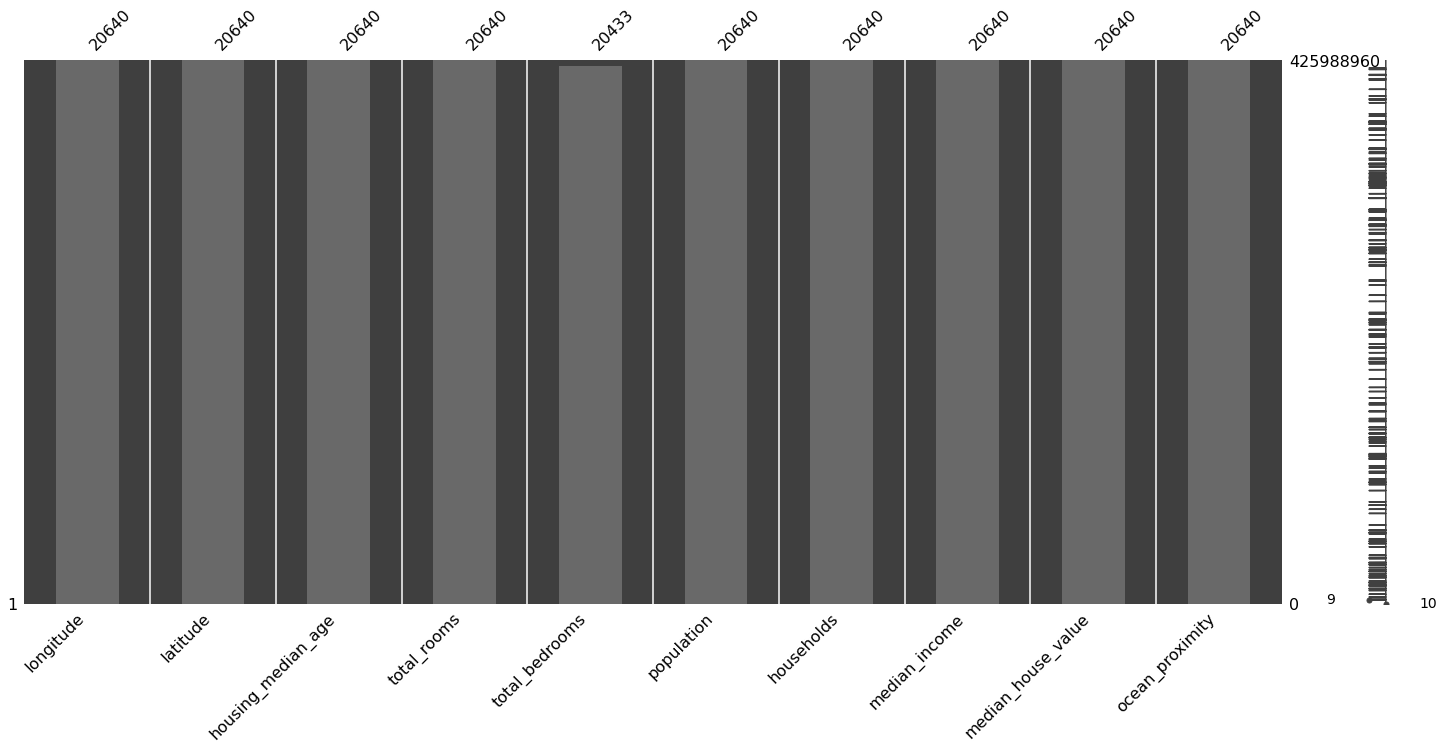

In [11]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
msno.bar(df)

In [12]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(df2)
X=imputer.transform(df2)
df_tr=pd.DataFrame(X,columns=df2.columns)
df_tr.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,0.0,1.0,0.0,0.0,0.0


In [14]:
housing_labels=df_tr["median_house_value"].copy()
df_tr.drop("median_house_value",axis=1,inplace=True)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_tr)
scaled_df = scaler.transform(df_tr)
scaled_df.shape

(20640, 13)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df, housing_labels, 
test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(16512, 13) (4128, 13)


In [17]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [18]:
from sklearn.metrics import mean_squared_error
y_pred=lin_reg.predict(X_test)
rms=np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

70061.13366111895


In [19]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

y_pred=tree_reg.predict(X_test)
rms=np.sqrt(mean_squared_error(y_test,y_pred))
print(rms)

69116.02657873192


In [20]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

107362.61132449022


In [21]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_jobs = -1)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

48957.76022128185


In [22]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_estimators': [3,10,30,50,100],'max_features':[2,4,6,8]},
]
forest_reg=RandomForestRegressor(random_state=42,n_jobs=-1)
grid_search=GridSearchCV(forest_reg, param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100]}])

In [23]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 100}

In [24]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_jobs=-1, random_state=42)

<BarContainer object of 13 artists>

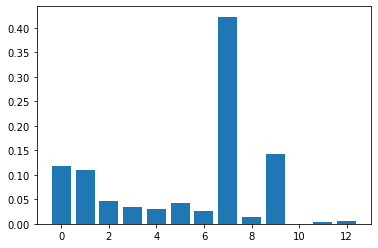

In [25]:
feature_importances=grid_search.best_estimator_.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
'n_estimators': randint(low=1, high=100),
'max_features': randint(low=1, high=8),
}
forest_reg = RandomForestRegressor(random_state=42, n_jobs=-1)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
cv=5, random_state=42)
rnd_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000270A49AD070>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000270A4C9A520>},
                   random_state=42)

In [27]:
cvres=rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(mean_score), params)

0.9056854456555165 {'max_features': 7, 'n_estimators': 52}
0.8991782010580713 {'max_features': 5, 'n_estimators': 15}
0.9012237089044975 {'max_features': 3, 'n_estimators': 72}
0.9002534975165288 {'max_features': 5, 'n_estimators': 21}
0.9056968829490221 {'max_features': 7, 'n_estimators': 83}
0.9058385062420957 {'max_features': 7, 'n_estimators': 75}
0.9015570849100717 {'max_features': 3, 'n_estimators': 88}
0.9007199366025562 {'max_features': 5, 'n_estimators': 24}
0.896089863504229 {'max_features': 3, 'n_estimators': 22}
0.833263289422681 {'max_features': 5, 'n_estimators': 2}


In [28]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=75, n_jobs=-1,
                      random_state=42)

In [29]:
final_model=rnd_search.best_estimator_
y_pred=final_model.predict(X_test)
rms=np.sqrt(mean_squared_error(y_test,y_pred))
print(rms)

48929.21253194573
